In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/NLP/IMDB Dataset.csv")

In [ ]:
df = df.iloc[:10000]

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(10000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [ ]:
df.isnull().sum() #No Null Values

,0
review,0
sentiment,0


In [ ]:
df.duplicated().sum() #17 Duplicates

np.int64(17)

In [ ]:
df = df.drop_duplicates()

# **CLEANING**

**CONVERTING INTO LOWERCASE**

In [ ]:
df['review'] = df['review'].str.lower()  #converting into lowercase

/tmp/ipython-input-15-3642778193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].str.lower()  #converting into lowercase


**STRIPING WHITESPACE**

In [ ]:
df['review']= df['review'].str.strip()   #striping whitespaces

/tmp/ipython-input-16-3511142672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']= df['review'].str.strip()   #striping whitespaces


**REMOVING HTML TAG**

In [ ]:
df['review']=df['review'].replace(r'<.*?>','',regex=True)  #removing html tags

/tmp/ipython-input-17-3292307264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].replace(r'<.*?>','',regex=True)  #removing html tags


**REMOVING URL**

In [ ]:
#check if a review contains an URL
df[df['review'].str.contains(r"https?://\S+|www\.\S+")].iloc[:50].values

array([['mario lewis of the competitive enterprise institute has written a definitive 120-page point-by-point, line-by-line refutation of this mendacious film, which should be titled a convenient lie. the website address where his debunking report, which is titled "a skeptic\'s guide to an inconvenient truth" can be found at is :www.cei.org. a shorter 10-page version can be found at: www.cei.org/pdf/5539.pdf once you read those demolitions, you\'ll realize that alleged "global warming" is no more real or dangerous than the y2k scare of 1999, which gore also endorsed, as he did the pseudo-scientific film the day after tomorrow, which was based on a book written by alleged ufo abductee whitley strieber. as james "the amazing" randi does to psychics, and philip klass does to ufos, and gerald posner does to jfk conspir-idiocy theories, so does mario lewis does to al gore\'s movie and the whole "global warming" scam.',
        'negative'],
       ["following directly from where the story le

In [ ]:
df['review']=df['review'].str.replace(r"https?://\S+|www\.\S+","")

**ABBREVIATIONS**

In [ ]:

def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)
    data = re.sub(r"donå«t", "do not", data)

    return data

In [ ]:
df['review'] = df['review'].apply(remove_abb)

In [ ]:
pip install symspellpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.4/158.4 kB 16.1 MB/s eta 0:00:00


In [ ]:
from symspellpy.symspellpy import SymSpell, Verbosity

sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = "frequency_dictionary_en_82_765.txt"
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

2025-07-27 19:26:54,773: E symspellpy.symspellpy] Dictionary file not found at frequency_dictionary_en_82_765.txt.
ERROR:symspellpy.symspellpy:Dictionary file not found at frequency_dictionary_en_82_765.txt.


False

**SPELLING CORRECTION**

In [ ]:
def correct_review(text: str) -> str:
    corrected_words = []
    for token in text.split():
        suggestions = sym_spell.lookup(token, Verbosity.CLOSEST, max_edit_distance=2, include_unknown=True)
        # take the top suggestion if available
        corrected = suggestions[0].term if suggestions else token
        corrected_words.append(corrected)
    return " ".join(corrected_words)


In [ ]:
df["review"] = df["review"].apply(correct_review)


In [ ]:
import string
def remove_punctuations(text):
    for i in string.punctuation:
      if i in text:
        text = text.replace(i,'')
    return text

In [ ]:
df['review']=df['review'].apply(remove_punctuations)

**PUNCTUATION REMOVAL**

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
df['tokenize_review']=df['review'].apply(word_tokenize)


**STOPWORDS**

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Define a function that filters out stopwords from a token list
def remove_stopwords(tokens: list[str]) -> list[str]:
    return [w for w in tokens if w.lower() not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Apply across the DataFrame column
df['tokenize_review'] = df['tokenize_review'].apply(remove_stopwords)

In [ ]:
df.head()

,review,sentiment,tokenize_review
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,..."


In [ ]:
df['review'] = df['tokenize_review'].apply(lambda x:" ".join(x))

In [ ]:
df['char_length'] = df['review'].str.len()

In [ ]:
df['word_length'] = df['tokenize_review'].apply(len)

In [ ]:
df.head()

,review,sentiment,tokenize_review,char_length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1142,166
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",588,85
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440,64
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863,125


/tmp/ipython-input-38-454664626.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment'] == 'positive']['char_length'])
/tmp/ipython-input-38-454664626.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment'] == 'negative']['char_length'])  #Helps you see how review l

<Axes: xlabel='char_length', ylabel='Density'>

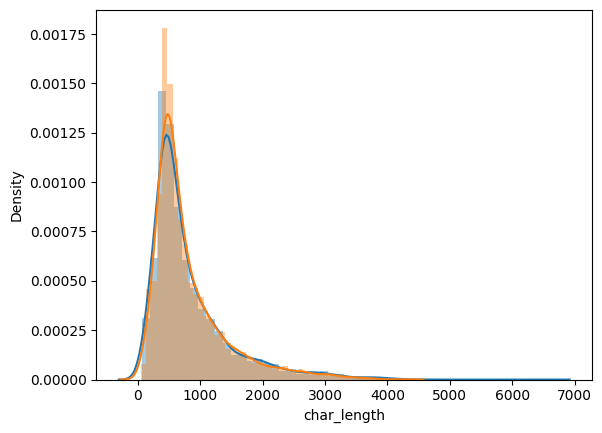

In [ ]:
import seaborn as sns
sns.distplot(df[df['sentiment'] == 'positive']['char_length'])
sns.distplot(df[df['sentiment'] == 'negative']['char_length'])  #Helps you see how review lengths vary between positive and negative reviews.

                                                                #insight: Are positive reviews generally longer or shorter than negative ones?

                                                                #This can help in feature selection — maybe review length is a useful feature for classification.

/tmp/ipython-input-39-3480675452.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment'] == 'positive']['word_length'])
/tmp/ipython-input-39-3480675452.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment'] == 'negative']['word_length'])


<Axes: xlabel='word_length', ylabel='Density'>

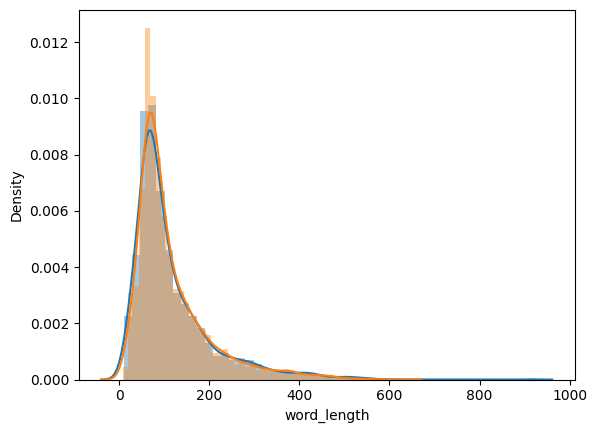

In [ ]:
sns.distplot(df[df['sentiment'] == 'positive']['word_length'])
sns.distplot(df[df['sentiment'] == 'negative']['word_length'])

In [ ]:
from nltk import ngrams

pd.Series(ngrams(df['tokenize_review'].sum(),2)).value_counts()

,count
"(ever, seen)",460
"(special, effects)",438
"(even, though)",372
"(one, best)",348
"(looks, like)",307
...,...
"(punches, regards)",1
"(regards, drugs)",1
"(drugs, sex)",1
"(violence, hardcore)",1


In [ ]:
pd.Series(ngrams(df['tokenize_review'].sum(),3)).value_counts()

,count
"(movie, ever, seen)",90
"(worst, movie, ever)",89
"(one, worst, movies)",55
"(movies, ever, seen)",53
"(worst, movies, ever)",50
...,...
"(masters, played, jason)",1
"(doug, masters, played)",1
"(goes, doug, masters)",1
"(sinclair, goes, doug)",1


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'positive']['review']))
plt.imshow(wc)
plt.axis('off')  # Removes axes
plt.title("Most Common Words in Positive Reviews", fontsize=20)


Text(0.5, 1.0, 'Most Common Words in negative Reviews')

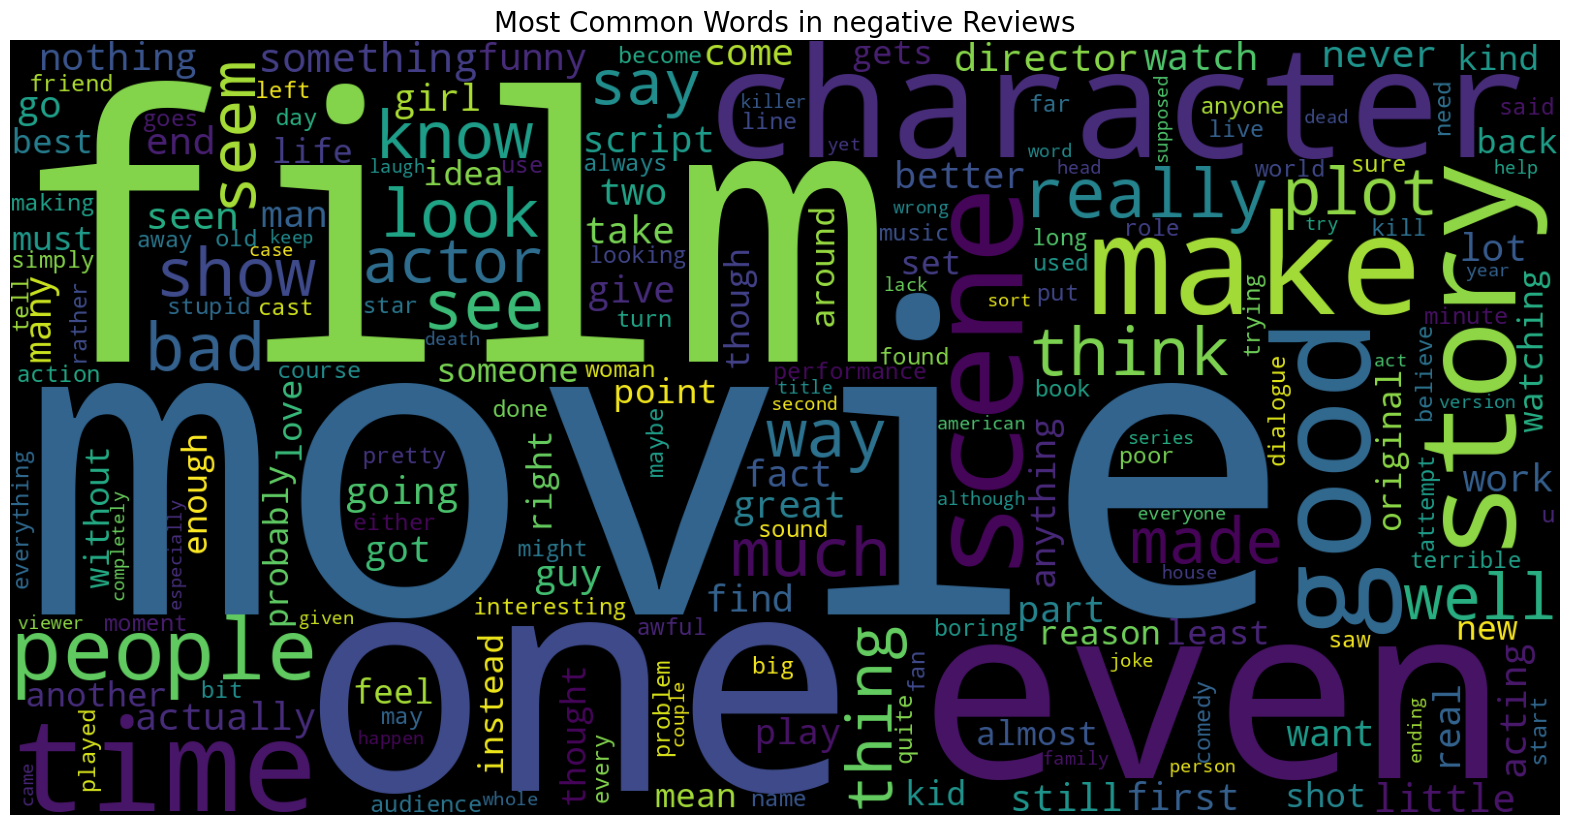

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # negative Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'negative']['review']))
plt.imshow(wc)
plt.axis('off')  # Removes axes
plt.title("Most Common Words in negative Reviews", fontsize=20)


**STEMMING**

In [ ]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize



In [ ]:
ps = PorterStemmer()


In [ ]:
def stem_review(text: str) -> str:
    tokens = word_tokenize(text.lower())
    stemmed = [ps.stem(token) for token in tokens]
    return " ".join(stemmed)


In [ ]:
df['review'] = df['review'].apply(stem_review)


In [ ]:
df.head()

In [ ]:
df.to_csv('NLP_Cleaned_IMDB.csv', index=False)

**BAG of WORDS**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000,ngram_range=(1,3))
bag_of_words = count_vectorizer.fit_transform(df['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names_out())

In [ ]:
bag_of_words

**PCA**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(bag_of_words.values)

In [ ]:
pca_result.shape

In [ ]:
sns.scatterplot(x=pca_result[:,0],y=pca_result[:,1],hue=df['sentiment'])

**NAIVE_BAYES**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# 1. Load your dataset (assuming a DataFrame 'df' with features X and target y)
# Example: df = pd.read_csv('your_data.csv')
X = bag_of_words # feature columns (using bag-of-words)
y = df['sentiment']                 # target column

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Scale features (important before PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Apply PCA
pca = PCA(n_components=0.95, whiten=False, random_state=42)
# Keep enough components to explain ~95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Number of PCA components: {pca.n_components_}")

# 5. Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train_pca, y_train)

# 6. Predict & evaluate
y_pred = nb.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Number of PCA components: 3259
Accuracy: 0.5468202303455183
              precision    recall  f1-score   support

    negative       0.54      0.64      0.59       992
    positive       0.56      0.45      0.50      1005

    accuracy                           0.55      1997
   macro avg       0.55      0.55      0.54      1997
weighted avg       0.55      0.55      0.54      1997



**RANDOM_FOREST**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = bag_of_words
y = df['sentiment']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Optional: scale features (RF is robust, but scaling can help)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize & train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)  # classifier.fit(X_train, y_train) also works :contentReference[oaicite:1]{index=1}

# Predict on test data
y_pred = rf.predict(X_test_scaled)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8432648973460191
              precision    recall  f1-score   support

    negative       0.84      0.85      0.84       992
    positive       0.85      0.84      0.84      1005

    accuracy                           0.84      1997
   macro avg       0.84      0.84      0.84      1997
weighted avg       0.84      0.84      0.84      1997

Confusion Matrix:
 [[842 150]
 [163 842]]


**TF_IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english")

# Fit to the text and transform it into a TF-IDF matrix
X_tfidf = vectorizer.fit_transform(df["review"])

# Convert to DataFrame for inspection
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out()
)

print(tfidf_df)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# 1. Load your dataset (assuming a DataFrame 'df' with features X and target y)
# Example: df = pd.read_csv('your_data.csv')
X = tfidf_df # feature columns (using bag-of-words)
y = df['sentiment']                 # target column

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Scale features (important before PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Apply PCA
pca = PCA(n_components=0.95, whiten=False, random_state=42)
# Keep enough components to explain ~95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


print(f"Number of PCA components: {pca.n_components_}")

# 5. Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train_pca, y_train)

# 6. Predict & evaluate
y_pred = nb.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))